Data Set Column Details
* male: Binary indicator for gender (1 = Male, 0 = Female).
* age: Age of the individual in years.
* education: Level of education (categorical values, details unspecified in the dataset).
* currentSmoker: Binary indicator if the individual is currently smoking (1 = Yes, 0 = No).
* cigsPerDay: Average number of cigarettes smoked per day (numeric, may be 0 for non-smokers).
* BPMeds: Binary indicator for whether the individual is on blood pressure medication (1 = Yes, 0 = No).
* prevalentStroke: Binary indicator for a history of stroke (1 = Yes, 0 = No).
* prevalentHyp: Binary indicator for a history of hypertension (1 = Yes, 0 = No).
* diabetes: Binary indicator for diabetes diagnosis (1 = Yes, 0 = No).
* totChol: Total cholesterol level in mg/dL.
* sysBP: Systolic blood pressure in mmHg.
* diaBP: Diastolic blood pressure in mmHg.
* BMI: Body Mass Index, a measure of body fat based on weight and height.
* heartRate: Heart rate in beats per minute.
* glucose: Glucose level in mg/dL.
* TenYearCHD: Binary indicator for whether the individual developed coronary heart disease within 10 years (1 = Yes, 0 = No).

The dataset is from Framingham, Massachusetts which has the details of patients.

Use Case: Our aim is to find out whether the patient has 10-year risk of future coronary heart disease (CHD)

In [53]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [2]:
df = pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4240, 16)

The dataset 4240 records and 16 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [6]:
df.drop(['education'], inplace=True, axis=1)

In [7]:
df.rename(columns = {'male':'sex'}, inplace = True)

Removed unnecessary column and renamed male column more accurately to sex indicating gender of a patient.

In [8]:
df.isnull().sum()

,0
sex,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


It is not a good idea to fill in the missing values because the attributes of the patient's data is very sensitive and there is no way to know even the nearby values unless and until advised by the doctor.

So in this case we will be simply removing all the nll values.

In [9]:
print(df.shape)
df.dropna(inplace= True, axis = 0)
print(df.shape)

(4240, 15)
(3751, 15)


In [10]:
df.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
df.shape

(3751, 15)

In [12]:
df.TenYearCHD.value_counts()

,count
TenYearCHD,
0,3179
1,572


We can see the target class is heavily imbalanced.

---


EDA1 : Exploratory Data Analysis of Heart Disease Dataset

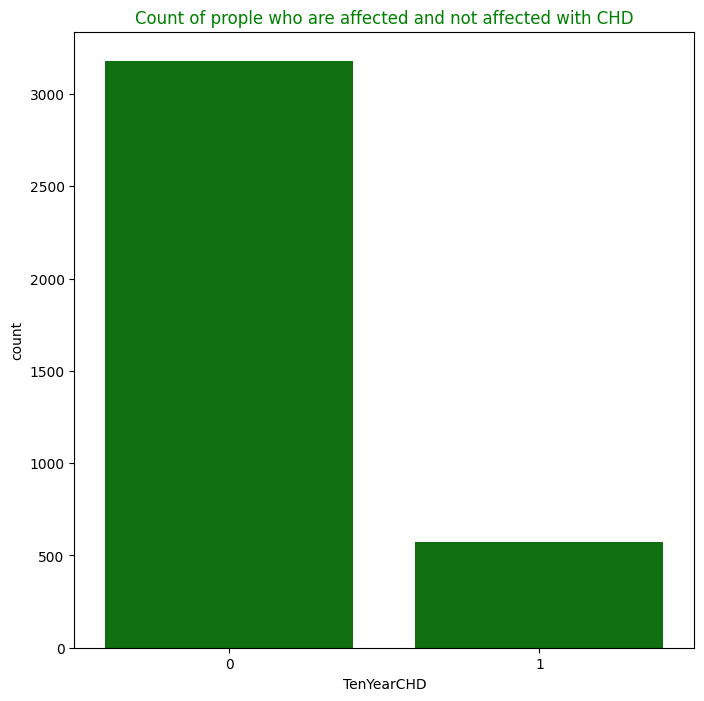

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x='TenYearCHD',data=df, color='green')
plt.title("Count of prople who are affected and not affected with CHD", color='green')
plt.show()

* We can see that majority of people are not affected with CHD.
* This also means our dataset is heavily imbalanced.

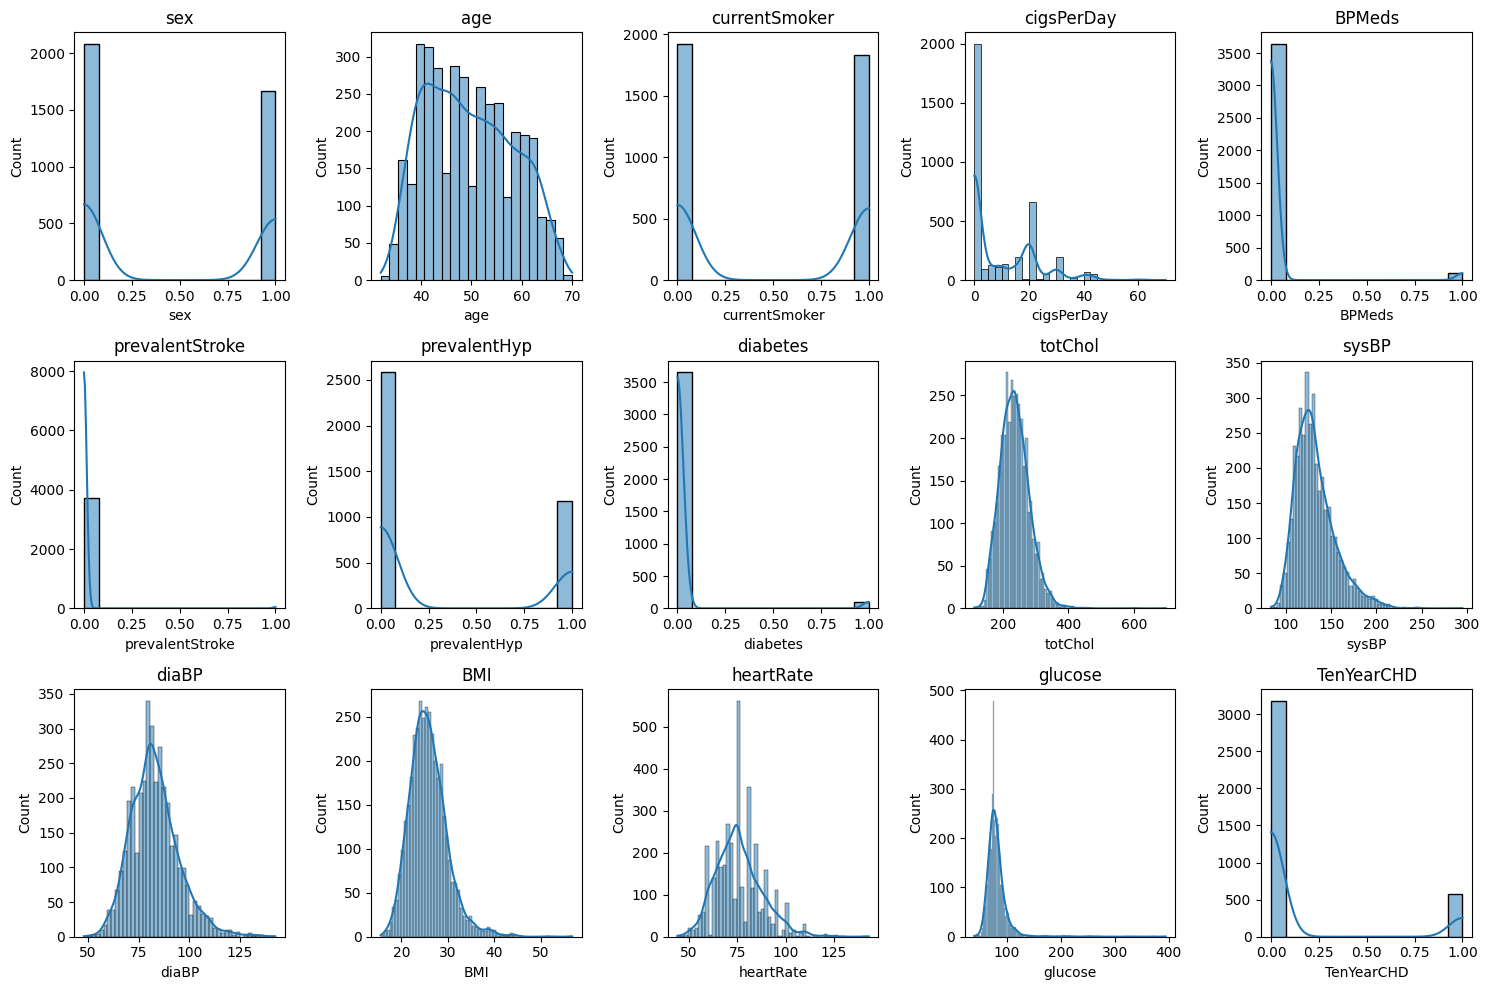

In [14]:
# Let's check the data distribution of all the features
plt.figure(figsize=(15, 10))
i = 0
for col in df.columns:
    plt.subplot(3, 5, i:=i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

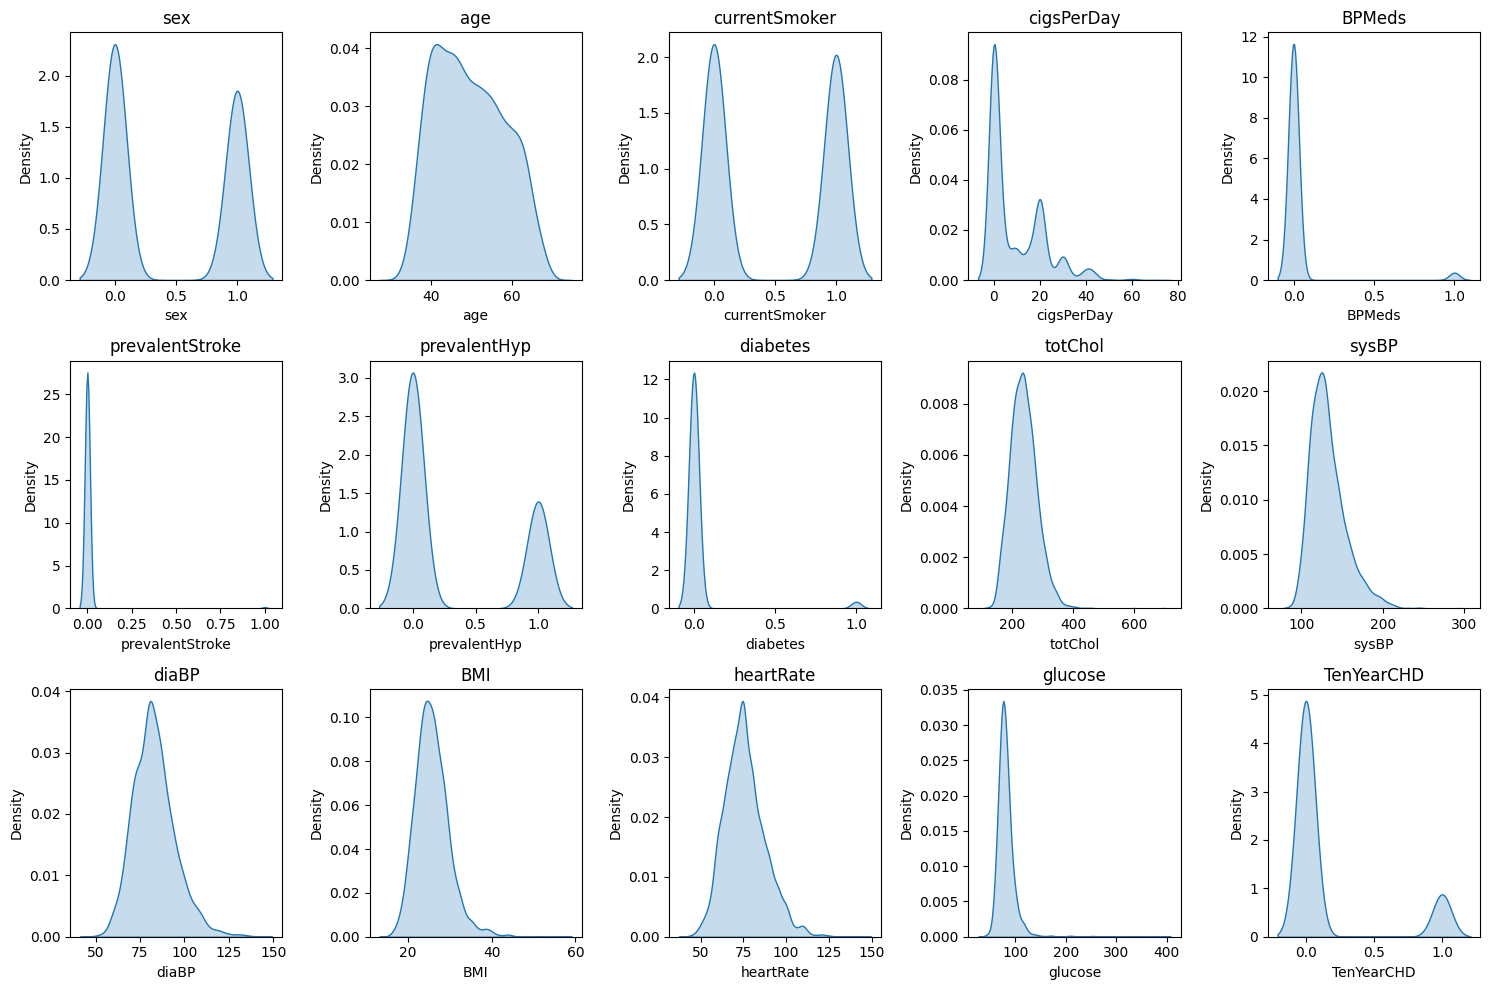

In [15]:
# Let's check the data distribution of all the features
plt.figure(figsize=(15, 10))
i = 0
for col in df.columns:
    plt.subplot(3, 5, i:=i+1)
    sns.kdeplot(df[col], fill=True, cbar=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [54]:
# Feature extraction
x = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

# Splitting the dataset for triaining and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

In [55]:
# Let's scale the data using standard sclaer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("New class distribution:", np.bincount(y_train_smote))

New class distribution: [2389 2389]


In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy = 'minority', random_state = 42)
# x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [72]:
# building ANN model
classifier = Sequential()
classifier.add(Dense(activation='relu', input_dim = 14, units=8, kernel_initializer='uniform'))
classifier.add(Dense(activation='relu', units=14, kernel_initializer='uniform'))
classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))
classifier.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 8)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 14)                  │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# To fix the disparity in target class lets use class weight
# from sklearn.utils.class_weight import compute_class_weight

# class_weights = compute_class_weight(
#     class_weight = "balanced",
#     classes = np.array([0, 1]),
#     y = df['TenYearCHD']
# )

# class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
# print("Class Weights: ", class_weight_dict)

Class Weights:  {0: 0.5899653979238755, 1: 3.2788461538461537}


In [75]:
# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#define early stopping for fine tuning
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights=True)

# Fitting the model
history = classifier.fit(
    x_train_smote, y_train_smote,
    validation_data = (x_test, y_test),
    batch_size = 8,
    epochs=40,
    # class_weight = class_weight_dict,
    # callbacks = [early_stopping]
    )

Epoch 1/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7190 - loss: 0.5699 - val_accuracy: 0.6706 - val_loss: 0.6076
Epoch 2/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7127 - loss: 0.5674 - val_accuracy: 0.6557 - val_loss: 0.6285
Epoch 3/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7274 - loss: 0.5608 - val_accuracy: 0.6727 - val_loss: 0.6061
Epoch 4/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7281 - loss: 0.5502 - val_accuracy: 0.6386 - val_loss: 0.6374
Epoch 5/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7337 - loss: 0.5595 - val_accuracy: 0.6770 - val_loss: 0.6046
Epoch 6/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7220 - loss: 0.5534 - val_accuracy: 0.6684 - val_loss: 0.6179
Epoch 7/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7229 - loss: 0.5528 - val_accuracy: 0.6599 - val_loss: 0.6262
Epoch 8/40
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7193 - loss: 0.5558 - val_accuracy: 0.

In [88]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
cm

array([[514,  56],
       [276,  92]])

In [90]:
print("Accuracy Score: ", accuracy_score(y_pred, y_test))

Accuracy Score:  0.6460554371002132


In [91]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc)

AUC-ROC Score: 0.6361272665070132


In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76       790
           1       0.25      0.62      0.36       148

    accuracy                           0.65       938
   macro avg       0.58      0.64      0.56       938
weighted avg       0.80      0.65      0.69       938

